In [4]:

# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [23]:
GYRO_COEF = 16.4# the scale factor represents the sensitivy factor applied to the sensor. 
                # divide by 131 to get degrees per second

In [6]:
def subtract_from_prev_val(df, col, init_val=0):
    return (df[col] - df.shift()[col])
    
def integrate_col(df, fxdx_col, dx_col, init_val):
    """
    Numeric integration from a panda data frame.
    Uses simply box method
    """
    fxdx_l = df[fxdx_col].tolist()
    dx_l = df[dx_col].tolist()
    prev_val = init_val
    y = [init_val]*len(df)
    for i in xrange(len(df)):
        y_val = prev_val + float(dx_l[i]) * fxdx_l[i]
        y[i] = y_val
        prev_val = y_val
    return np.array(y)

44
87


97.953088170493544

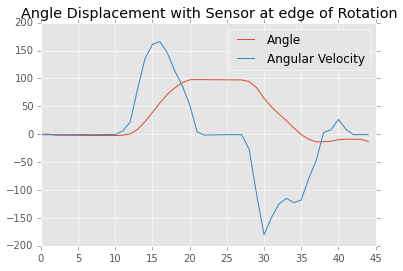

In [49]:

# wheel_rad = 0.110
wheel_rad = 1
df_edge = pd.read_csv('data/outer_wheel_00.csv')
half_len = len(df_edge) / 2
full_len = len(df_edge) - 1
print half_len
print full_len
df_edge.drop(df.index[44:87], inplace=True)
df_edge['gz'] = df_edge['gz'] / (GYRO_COEF * wheel_rad);
df_edge['time_diff'] = subtract_from_prev_val(df_edge, 'timestamp').fillna(0)/1000
pos = integrate_col(df_edge, 'gz', 'time_diff', 0)
plt.plot(integrate_col(df_edge, 'gz', 'time_diff', 0), label='Angle')
plt.plot(df_edge['gz'], label='Angular Velocity')
plt.title('Angle Displacement with Sensor at edge of Rotation')
plt.legend()
max(integrate_col(df_edge, 'gz', 'time_diff', 0))

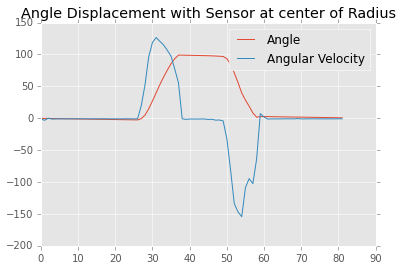

In [53]:

# wheel_rad = 0.110
wheel_rad = 1
df_cen = pd.read_csv('data/inner_wheel_00.csv')
df_cen['gz'] = df_cen['gz'] / (GYRO_COEF * wheel_rad);
df_cen['time_diff'] = subtract_from_prev_val(df_cen, 'timestamp').fillna(0)/1000
pos = integrate_col(df_cen, 'gz', 'time_diff', 0)
plt.plot(integrate_col(df_cen, 'gz', 'time_diff', 0), label='Angle')
plt.plot(df_cen['gz'], label='Angular Velocity')
plt.title('Angle Displacement with Sensor at center of Radius')
plt.legend()

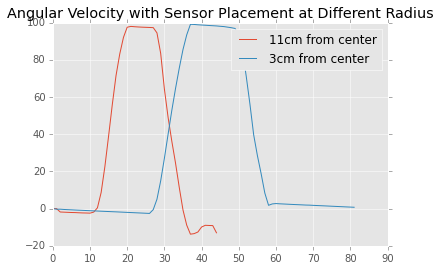

In [57]:
plt.plot(integrate_col(df_edge, 'gz', 'time_diff', 0), label='11cm from center')
plt.plot(integrate_col(df_cen, 'gz', 'time_diff', 0), label='3cm from center')
plt.title('Angular Velocity with Sensor Placement at Different Radius')
plt.legend()